# 🔵**Parte 6: Aprendizagem Baseada em Instâncias** 🔵

 **KNN: k nearest neighbours** (k vizinhos mais próximos)

 Este algoritmo não gera modelo. Ele apenas calcula distância.

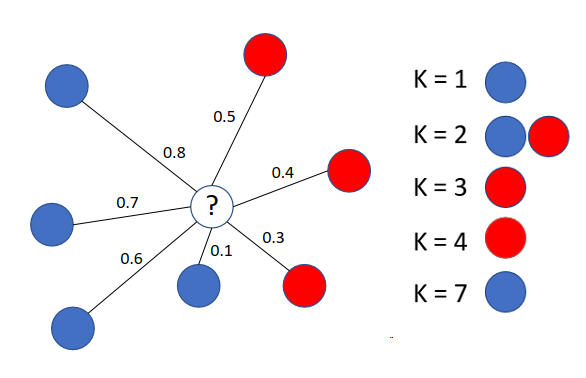

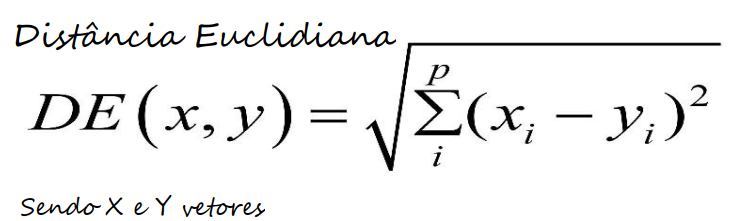

Quanto menor a DE, mais próximos os elementos estarão.

**Aplicabilidade do modelo:** filtragem colaborativa. Utilizado pela Netflix para sugerir filmes, por exemplo! 😀

## ⚜ Sobre variáveis categóricas:

Esse modelo não suporta variáveis categóricas. Precisa trabalhar com encoding.

Sugere-se gerar função que coloca (yi - xi) = 1 caso yi != xi. Isso porque não faz sentido considerar magnitude de diferença entre labels, apenas entre posições.

## ⚜ Sobre normalização e padronização

Podemos perceber pela fórmula da distância euclidina que o tamanho das variáveis númericas influencia no resultado do modelo. Para o Knn é necessário padronizar a escala das variáveis.

> Lembra: **MaxMinScaler ou StandardScaler**

## Qual número de vizinhos considerar?
Default: 3 ou 5.
Se muitos, gera overfitting. Se poucos, pode ser influenciado por outliers.

# 🔴 Aprendizagem baseada em instâncias - _knn_

In [22]:
import pandas as pd
import numpy as np
import pickle
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from yellowbrick.classifier import ConfusionMatrix

## ⭕ Base credit data - 98.60%

### Importando dados

In [12]:
with open('credit.pkl', 'rb') as f:
  X_credit_treino,  X_credit_teste, Y_credit_treino, Y_credit_teste = pickle.load(f)

In [13]:
X_credit_treino.shape, Y_credit_treino.shape

((1500, 3), (1500,))

In [14]:
X_credit_teste.shape, Y_credit_teste.shape

((500, 3), (500,))

### Criando modelo

In [8]:
knn_credit = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p =  2 )

# p = 2 distância euclidiana (tem outras fórmulas de calcular)

In [6]:
# Como pedir ajuda no Python? Consultando documentação dentro do Colab
KNeighborsClassifier?

In [15]:
knn_credit.fit(X_credit_treino, Y_credit_treino)

KNeighborsClassifier()

### Previsões e análise de modelo

In [19]:
previsoes = knn_credit.predict(X_credit_teste)

In [21]:
accuracy_score(Y_credit_teste, previsoes)

0.986

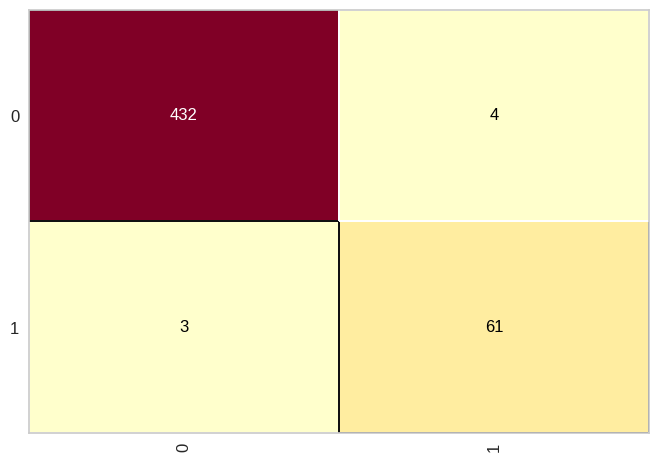

In [24]:
cm = ConfusionMatrix(knn_credit)
cm.fit(X_credit_treino, Y_credit_treino)
cm.score(X_credit_teste, Y_credit_teste);

In [25]:
print(classification_report(Y_credit_teste, previsoes))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       436
           1       0.94      0.95      0.95        64

    accuracy                           0.99       500
   macro avg       0.97      0.97      0.97       500
weighted avg       0.99      0.99      0.99       500



## ⭕ Base census - 82.90%

### Importando dados

In [30]:
with open('census.pkl', 'rb') as f:
  X_census_treino, X_census_teste, Y_census_treino,Y_census_teste = pickle.load(f)

In [31]:
X_census_treino.shape,Y_census_treino.shape

((27676, 108), (27676,))

In [33]:
X_census_teste.shape, Y_census_teste.shape

((4885, 108), (4885,))

### Criando modelo

In [34]:
knn_census = KNeighborsClassifier(n_neighbors = 10)
knn_census.fit(X_census_treino, Y_census_treino)

KNeighborsClassifier(n_neighbors=10)

In [35]:
previsoes_census = knn_census.predict(X_census_teste)

### Avaliando

In [37]:
accuracy_score(Y_census_teste, previsoes_census)

0.8290685772773797

0.8290685772773797

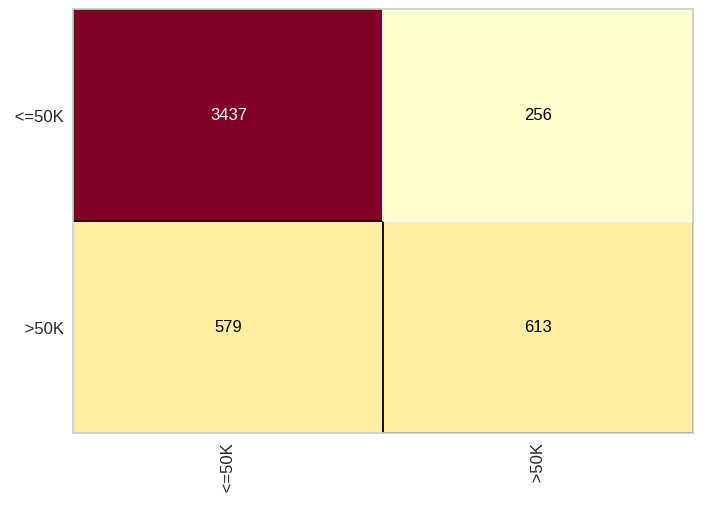

In [38]:
cm = ConfusionMatrix(knn_census)
cm.fit(X_census_treino, Y_census_treino)
cm.score(X_census_teste, Y_census_teste)

In [39]:
print(classification_report(Y_census_teste, previsoes_census))

              precision    recall  f1-score   support

       <=50K       0.86      0.93      0.89      3693
        >50K       0.71      0.51      0.59      1192

    accuracy                           0.83      4885
   macro avg       0.78      0.72      0.74      4885
weighted avg       0.82      0.83      0.82      4885

